# Import Libraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

# Define decision tree function

In [2]:
def decision_tree_reg(P, N_train, x_train, y_train):
    
    node_indices = {}  #initialization  #keep tracking
    is_terminal = {}
    need_split = {}
    node_splits = {}  # we dont use node frequencies since this is not a classification problem
  
    node_indices[1] = np.array(range(N_train))
    is_terminal[1] = False
    need_split[1] = True
  
    while True:
      
        split_nodes = [key for key, value in need_split.items() if value == True]  #iterate two indices in dictionary
   
        if len(split_nodes) == 0:   #if there is nothing to split: break
            break
  
        for split_node in split_nodes:
            data_indices = node_indices[split_node]
            need_split[split_node] = False
      
            if len(data_indices) <= P:   #P is user defined parameter
                node_splits[split_node] = np.mean(y_train[data_indices])
                is_terminal[split_node] = True
            else:
                is_terminal[split_node] = False
                unique_values = np.sort(np.unique(x_train[data_indices]))
                split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
                split_scores = np.repeat(0.0, len(split_positions))

                for s in range(len(split_positions)):
                    left_indices = data_indices[x_train[data_indices] <= split_positions[s]]
                    right_indices = data_indices[x_train[data_indices] > split_positions[s]]
                    error=0
                    left_mean = np.mean(y_train[left_indices])
                    right_mean = np.mean(y_train[right_indices])
                    error = error + np.sum((y_train[left_indices]-left_mean)**2) + np.sum((y_train[right_indices] - right_mean) ** 2)
                    split_scores[s] = error / (len(left_indices) + len(right_indices))

                best_splits = split_positions[np.argmin(split_scores)]
                node_splits[split_node] = best_splits

                left_indices = data_indices[x_train[data_indices] <= best_splits]
                node_indices[2 * split_node] = left_indices
                is_terminal[2 * split_node] = False
                need_split[2 * split_node] = True

                right_indices = data_indices[x_train[data_indices] > best_splits]
                node_indices[2 * split_node + 1] = right_indices
                is_terminal[2 * split_node + 1] = False
                need_split[2 * split_node + 1] = True
    return is_terminal, node_splits

# Define a function for regression results

In [3]:
def get_regression_results(data, node_splits, is_terminal):
    N = data.shape[0]
    regression_results = np.zeros(N)
    for i in range(N):
        tree_index = 1
        while True:
            if is_terminal[tree_index] == True:
                regression_results[i] = node_splits[tree_index]
                break
            else:
                if data[i] <= node_splits[tree_index]:
                    tree_index *= 2
                else:
                    tree_index *= 2
                    tree_index += 1
    return regression_results

# RMSE function

In [4]:
#calculate rmse
def get_rmse(y_truth, y_pred):
    return np.sqrt(np.mean((y_truth - y_pred)**2))

# Import Data Set

In [5]:
training_set = np.genfromtxt("hw05_data_set_train.csv", delimiter = ",", skip_header=False)
test_set = np.genfromtxt("hw05_data_set_test.csv", delimiter = ",", skip_header=False)

N_train=training_set.shape[0]
N_test=test_set.shape[0]

x_train = np.zeros(N_train)
y_train = np.zeros(N_train)
x_test = np.zeros(N_test)
y_test = np.zeros(N_test)

x_train[:] = training_set[:,0]
y_train[:] = training_set[:,1]
x_test[:] = test_set[:,0]
y_test[:] = test_set[:,1]

# Learn Decision Tree with P=50

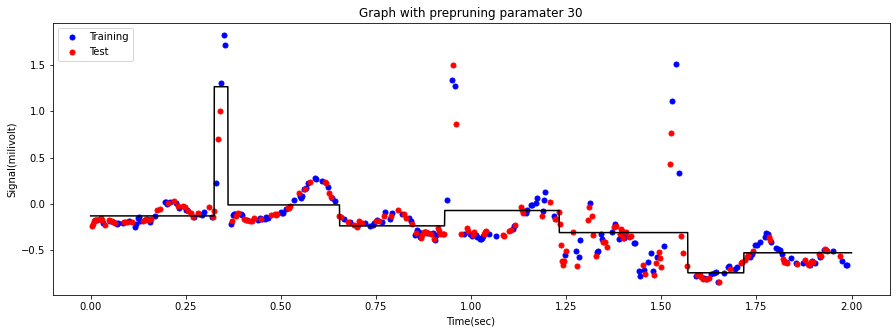

In [6]:
is_terminal, node_splits = decision_tree_reg(30, N_train, x_train, y_train)   #P is 30

data_interval = np.linspace(0, 2, 3600)  
regression_results = get_regression_results(data_interval, node_splits, is_terminal)

plt.figure(figsize = (15, 5))
plt.plot(x_train,y_train,"b.", markersize = 10,label="Training")
plt.plot(x_test,y_test,"r.", markersize = 10,label="Test")
    
plt.plot(data_interval, regression_results, "k-")

plt.xlabel("Time(sec)")
plt.ylabel("Signal(milivolt)")
plt.title("Graph with prepruning paramater 30")

plt.legend(loc='upper left')
plt.show()

# Print RMSE Results

In [7]:
test_results = get_regression_results(x_test, node_splits, is_terminal)
rmse = get_rmse(y_test, test_results)
print("RMSE in test set is {} when P is 30".format(rmse))

train_results = get_regression_results(x_train, node_splits, is_terminal)
rmse = get_rmse(y_train, train_results)
print("RMSE in training set is {} when P is 30".format(rmse))

RMSE in test set is 0.22542236010134897 when P is 30
RMSE in training set is 0.2881929342801884 when P is 30


# Draw RMSE graph for training and test data

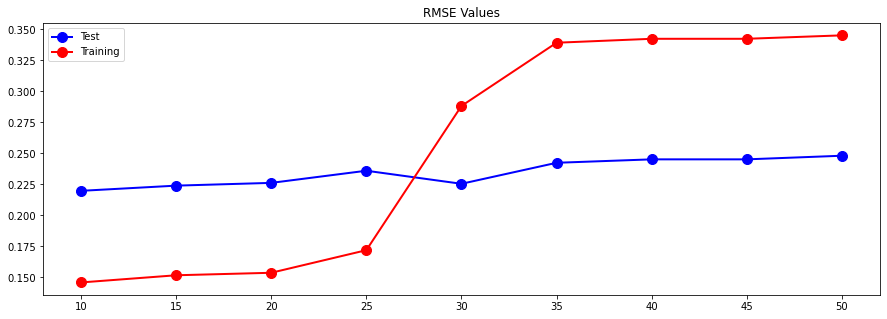

In [8]:
rmse_test_values = np.zeros(9)
rmse_train_values = np.zeros(9)
p_values = np.arange(10, 55, 5)  # P is from 10 to 50 with step size 5

for i in range(p_values.shape[0]):
    is_terminal_iter,node_splits_iter = decision_tree_reg(p_values[i], N_train, x_train, y_train)
    rmse_test_values[i] = get_rmse(y_test, get_regression_results(x_test, node_splits_iter, is_terminal_iter))
    rmse_train_values[i] = get_rmse(y_train, get_regression_results(x_train, node_splits_iter, is_terminal_iter))

plt.figure(figsize = (15, 5))
plt.plot(p_values, rmse_test_values, "ko-", linewidth=2, markersize = 10, color="blue", label="Test")
plt.plot(p_values, rmse_train_values, "ko-", linewidth=2, markersize = 10, color="red", label="Training")
plt.title("RMSE Values")
plt.legend()
plt.show()